### Header

In [1]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

### Constant

In [2]:
RESCALE_PIXEL = 28

### Data loader method

In [3]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        length = len(images)
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
        print ("Total image in directory:", d, " is:", len(images) - length)
    return images, labels

### Directory constants

In [4]:
ROOT_PATH = "/home/submukhe/tryout/data_bkup"
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

### Load data

In [5]:
images, labels = load_data(train_data_dir)

Total image in directory: 00056  is: 95
Total image in directory: 00019  is: 231
Total image in directory: 00034  is: 46
Total image in directory: 00052  is: 27
Total image in directory: 00054  is: 118
Total image in directory: 00060  is: 9
Total image in directory: 00031  is: 63
Total image in directory: 00006  is: 18
Total image in directory: 00058  is: 15
Total image in directory: 00041  is: 148
Total image in directory: 00014  is: 43
Total image in directory: 00037  is: 98
Total image in directory: 00027  is: 18
Total image in directory: 00039  is: 196
Total image in directory: 00055  is: 12
Total image in directory: 00049  is: 12
Total image in directory: 00007  is: 157
Total image in directory: 00059  is: 42
Total image in directory: 00057  is: 78
Total image in directory: 00026  is: 6
Total image in directory: 00005  is: 11
Total image in directory: 00051  is: 27
Total image in directory: 00035  is: 60
Total image in directory: 00032  is: 316
Total image in directory: 00036  is:

## Basic explorations

In [6]:
images_array = np.array(images)
labels_array = np.array(labels)

### Print the `images` dimensions

In [7]:
print(images_array.ndim)

1


### Print the number of `images`'s elements

In [8]:
print(images_array.size)

4575


### Print the first instance of `images`

In [9]:
images_array[0]

array([[[187, 211, 210],
        [189, 214, 214],
        [183, 209, 208],
        ..., 
        [106, 106,  94],
        [100, 102,  90],
        [105, 108,  95]],

       [[190, 210, 210],
        [195, 214, 214],
        [187, 204, 205],
        ..., 
        [100, 102,  90],
        [ 98, 101,  88],
        [107, 111,  97]],

       [[188, 215, 213],
        [187, 211, 210],
        [187, 208, 208],
        ..., 
        [ 98,  97,  86],
        [ 99,  99,  88],
        [107, 108,  95]],

       ..., 
       [[114, 141, 149],
        [142, 186, 184],
        [172, 204, 203],
        ..., 
        [ 70,  59,  62],
        [ 67,  56,  59],
        [ 67,  58,  60]],

       [[119, 151, 159],
        [156, 204, 204],
        [178, 214, 216],
        ..., 
        [ 70,  62,  63],
        [ 69,  61,  63],
        [ 69,  61,  63]],

       [[114, 149, 158],
        [145, 195, 197],
        [160, 199, 203],
        ..., 
        [ 74,  69,  68],
        [ 75,  68,  69],
        [ 73,  64,

### Print the first instance of `images` shape

In [10]:
images_array[0][0].shape

(135, 3)

In [11]:
images_array[0].shape

(134, 135, 3)

### Print the `labels` dimensions

In [12]:
print(labels_array.ndim)

1


### Print the number of `labels`'s elements

In [13]:
print(labels_array.size)

4575


### Count the number of labels

In [14]:
 print(len(set(labels_array)))

62


### Distribution of images between labels

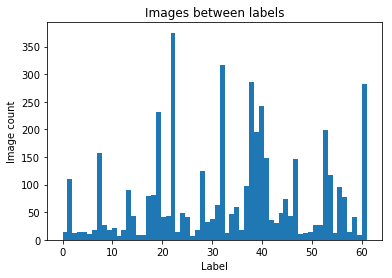

In [15]:
# Make a histogram with 62 bins of the `labels` data
plt.hist(labels_array, 62)
plt.title("Images between labels")
plt.xlabel("Label")
plt.ylabel("Image count")


# Show the plot
plt.show()

### Visualisation of images

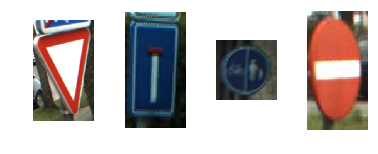

In [16]:
#Random image index
traffic_signs = [100, 500, 1000, 3000]


for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

### Print image shapes along with it 

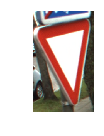

shape: (262, 158, 3), min: 9, max: 255


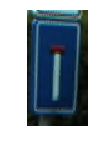

shape: (93, 49, 3), min: 0, max: 253


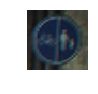

shape: (56, 57, 3), min: 10, max: 126


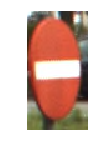

shape: (96, 49, 3), min: 14, max: 255


In [17]:
# Determine the (random) indexes of the images
traffic_signs = [100, 500, 1000, 3000]
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))


### Print images from every label or bucket

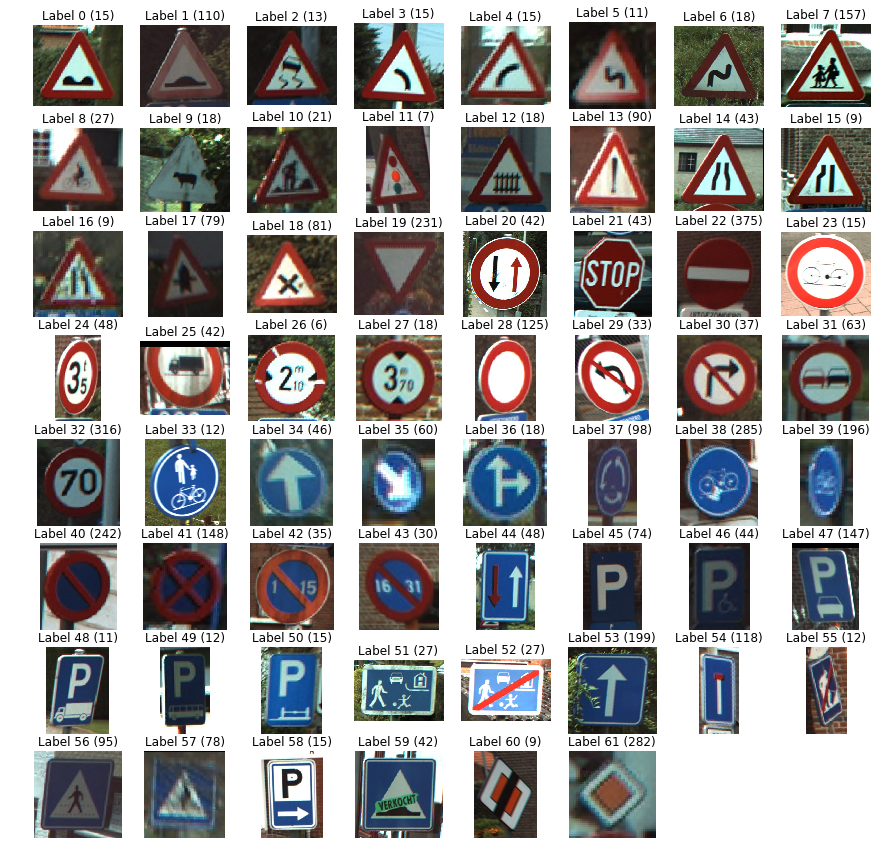

In [18]:
# Get the unique labels
unique_labels = set(labels)
# Initialize the figure
plt.figure(figsize=(15, 15))
# Set a counter
i = 1
# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image
    plt.imshow(image)
# Show the plot
plt.show()

### Rescalling images
Rescalling is needed, because, every image can have different size.

In [19]:
images32 = [transform.resize(image, (RESCALE_PIXEL, RESCALE_PIXEL)) for image in images]
images32 = np.array(images32)

/home/submukhe/anaconda2/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### Print same images after transformation

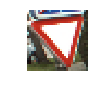

shape: (28, 28, 3), min: 0.03651960784313706, max: 1.0


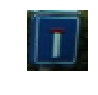

shape: (28, 28, 3), min: 0.0, max: 0.769712885154063


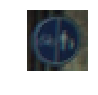

shape: (28, 28, 3), min: 0.05220588235294113, max: 0.4895308123249298


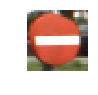

shape: (28, 28, 3), min: 0.05931372549019617, max: 1.0


In [20]:
# Determine the (random) indexes of the images
traffic_signs = [100, 500, 1000, 3000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))



### Convert to grayscale to remove color values

In [21]:
images32_gray = rgb2gray(np.array(images32))

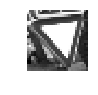

shape: (28, 28), min: 0.05030545518207295, max: 1.0


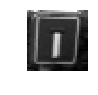

shape: (28, 28), min: 0.02115200280112041, max: 0.7118077022058837


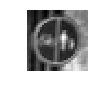

shape: (28, 28), min: 0.060523165266106405, max: 0.4612905987394959


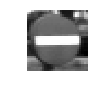

shape: (28, 28), min: 0.07886681722689061, max: 0.9994876645658264


In [22]:
# Determine the (random) indexes of the images
traffic_signs = [100, 500, 1000, 3000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32_gray[traffic_signs[i]], cmap = 'gray')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32_gray[traffic_signs[i]].shape, 
                                                  images32_gray[traffic_signs[i]].min(), 
                                                  images32_gray[traffic_signs[i]].max()))


### WIP - Changing brightness, shifting, rotating, Blurring

### Modelling NN

### Create input variable and outcome's place holder. 
Place holder is to assign values at runtime

In [23]:
x = tf.placeholder(dtype = tf.float32, shape = [None, RESCALE_PIXEL, RESCALE_PIXEL])
y = tf.placeholder(dtype = tf.int32, shape = [None])

### Flattern the images to feed into network

In [24]:
images_flat = tf.contrib.layers.flatten(x)

### Create logits with Relu

In [25]:
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

### Define a loss function
`sparse_softmax_cross_entropy_with_logits` - Ever outcome is regarded as unique

In [26]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

### Optimizer addition
`AdamOptimizer` is used. It behaves like SGD

In [27]:
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

### Prediction sample

In [28]:
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [29]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


### Running the net-
We have to create a `session` to initialize all the variable and graph. Then it will run

In [30]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('Starting EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32_gray, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH', str(i))

Starting EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH 0
Starting EPOCH 1
DONE WITH EPOCH 1
Starting EPOCH 2
DONE WITH EPOCH 2
Starting EPOCH 3
DONE WITH EPOCH 3
Starting EPOCH 4
DONE WITH EPOCH 4
Starting EPOCH 5
DONE WITH EPOCH 5
Starting EPOCH 6
DONE WITH EPOCH 6
Starting EPOCH 7
DONE WITH EPOCH 7
Starting EPOCH 8
DONE WITH EPOCH 8
Starting EPOCH 9
DONE WITH EPOCH 9
Starting EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH 10
Starting EPOCH 11
DONE WITH EPOCH 11
Starting EPOCH 12
DONE WITH EPOCH 12
Starting EPOCH 13
DONE WITH EPOCH 13
Starting EPOCH 14
DONE WITH EPOCH 14
Starting EPOCH 15
DONE WITH EPOCH 15
Starting EPOCH 16
DONE WITH EPOCH 16
Starting EPOCH 17
DONE WITH EPOCH 17
Starting EPOCH 18
DONE WITH EPOCH 18
Starting EPOCH 19
DONE WITH EPOCH 19
Starting EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH 20
Starting EPOCH 21
DONE WITH EPOCH 21
Starting EPOCH 22
DONE WITH EPOCH 22
Starting EPOCH 23
DONE

DONE WITH EPOCH 191
Starting EPOCH 192
DONE WITH EPOCH 192
Starting EPOCH 193
DONE WITH EPOCH 193
Starting EPOCH 194
DONE WITH EPOCH 194
Starting EPOCH 195
DONE WITH EPOCH 195
Starting EPOCH 196
DONE WITH EPOCH 196
Starting EPOCH 197
DONE WITH EPOCH 197
Starting EPOCH 198
DONE WITH EPOCH 198
Starting EPOCH 199
DONE WITH EPOCH 199
Starting EPOCH 200
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH 200


### Evaluating the net

In [31]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32_gray)), 10)
sample_images = [images32_gray[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)



[32, 47, 22, 45, 14, 51, 36, 47, 5, 61]
[32 47 22 32 14 38 38 47  7 61]


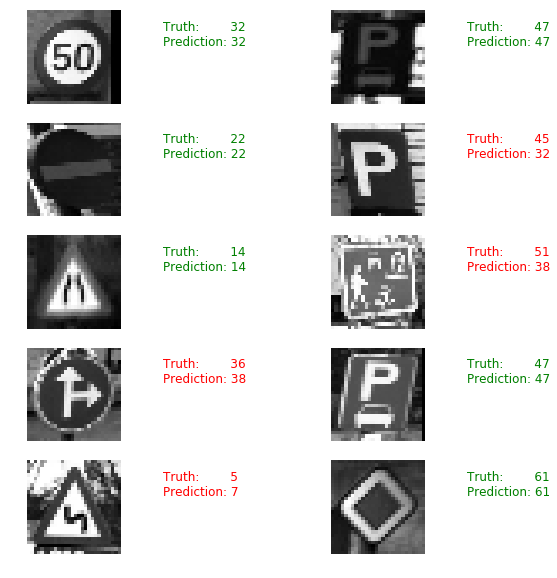

In [32]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap = 'gray')

plt.show()



In [33]:


# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (RESCALE_PIXEL, RESCALE_PIXEL)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))



Total image in directory: 00056  is: 33
Total image in directory: 00019  is: 163
Total image in directory: 00034  is: 9
Total image in directory: 00052  is: 0
Total image in directory: 00054  is: 48
Total image in directory: 00060  is: 11
Total image in directory: 00031  is: 86
Total image in directory: 00006  is: 6
Total image in directory: 00058  is: 9
Total image in directory: 00041  is: 11
Total image in directory: 00014  is: 15
Total image in directory: 00037  is: 31
Total image in directory: 00027  is: 9
Total image in directory: 00039  is: 99
Total image in directory: 00055  is: 15
Total image in directory: 00049  is: 3
Total image in directory: 00007  is: 90
Total image in directory: 00059  is: 17
Total image in directory: 00057  is: 41
Total image in directory: 00026  is: 0
Total image in directory: 00005  is: 3
Total image in directory: 00051  is: 3
Total image in directory: 00035  is: 154
Total image in directory: 00032  is: 422
Total image in directory: 00036  is: 0
Total i

/home/submukhe/anaconda2/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.626


In [34]:
sess.close()

### Create binary image to check the accuracy

In [35]:
images32_binary = [np.where(gray_image > np.mean(gray_image),1.0,0.0) for gray_image in images32_gray]

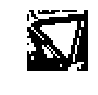

shape: (28, 28), min: 0.05030545518207295, max: 1.0


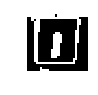

shape: (28, 28), min: 0.02115200280112041, max: 0.7118077022058837


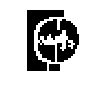

shape: (28, 28), min: 0.060523165266106405, max: 0.4612905987394959


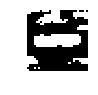

shape: (28, 28), min: 0.07886681722689061, max: 0.9994876645658264


In [36]:
# Determine the (random) indexes of the images
traffic_signs = [100, 500, 1000, 3000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32_binary[traffic_signs[i]], cmap = 'gray')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32_gray[traffic_signs[i]].shape, 
                                                  images32_gray[traffic_signs[i]].min(), 
                                                  images32_gray[traffic_signs[i]].max()))

### Create the model again

In [37]:
x = tf.placeholder(dtype = tf.float32, shape = [None, RESCALE_PIXEL, RESCALE_PIXEL])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [38]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('Starting EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32_binary, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH', str(i))

Starting EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH 0
Starting EPOCH 1
DONE WITH EPOCH 1
Starting EPOCH 2
DONE WITH EPOCH 2
Starting EPOCH 3
DONE WITH EPOCH 3
Starting EPOCH 4
DONE WITH EPOCH 4
Starting EPOCH 5
DONE WITH EPOCH 5
Starting EPOCH 6
DONE WITH EPOCH 6
Starting EPOCH 7
DONE WITH EPOCH 7
Starting EPOCH 8
DONE WITH EPOCH 8
Starting EPOCH 9
DONE WITH EPOCH 9
Starting EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH 10
Starting EPOCH 11
DONE WITH EPOCH 11
Starting EPOCH 12
DONE WITH EPOCH 12
Starting EPOCH 13
DONE WITH EPOCH 13
Starting EPOCH 14
DONE WITH EPOCH 14
Starting EPOCH 15
DONE WITH EPOCH 15
Starting EPOCH 16
DONE WITH EPOCH 16
Starting EPOCH 17
DONE WITH EPOCH 17
Starting EPOCH 18
DONE WITH EPOCH 18
Starting EPOCH 19
DONE WITH EPOCH 19
Starting EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH 20
Starting EPOCH 21
DONE WITH EPOCH 21
Starting EPOCH 22
DONE WITH EPOCH 22
Starting EPOCH 2

DONE WITH EPOCH 194
Starting EPOCH 195
DONE WITH EPOCH 195
Starting EPOCH 196
DONE WITH EPOCH 196
Starting EPOCH 197
DONE WITH EPOCH 197
Starting EPOCH 198
DONE WITH EPOCH 198
Starting EPOCH 199
DONE WITH EPOCH 199
Starting EPOCH 200
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH 200


In [42]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32_binary)), 10)
sample_images = [images32_binary[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

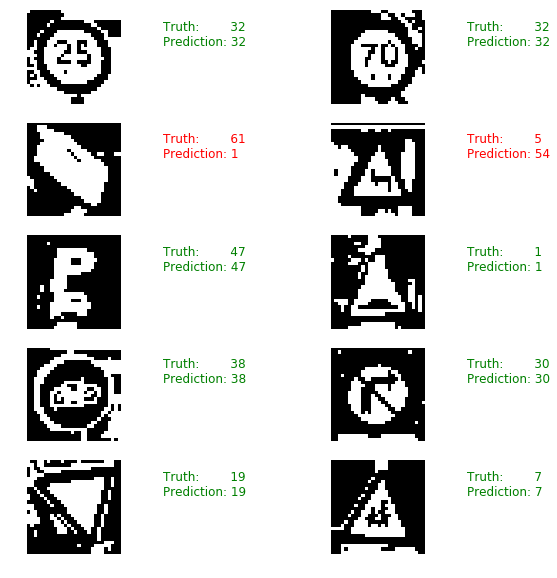

In [43]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap = 'gray')

plt.show()


In [44]:


# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (RESCALE_PIXEL, RESCALE_PIXEL)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))



Total image in directory: 00056  is: 33
Total image in directory: 00019  is: 163
Total image in directory: 00034  is: 9
Total image in directory: 00052  is: 0
Total image in directory: 00054  is: 48
Total image in directory: 00060  is: 11
Total image in directory: 00031  is: 86
Total image in directory: 00006  is: 6
Total image in directory: 00058  is: 9
Total image in directory: 00041  is: 11
Total image in directory: 00014  is: 15
Total image in directory: 00037  is: 31
Total image in directory: 00027  is: 9
Total image in directory: 00039  is: 99
Total image in directory: 00055  is: 15
Total image in directory: 00049  is: 3
Total image in directory: 00007  is: 90
Total image in directory: 00059  is: 17
Total image in directory: 00057  is: 41
Total image in directory: 00026  is: 0
Total image in directory: 00005  is: 3
Total image in directory: 00051  is: 3
Total image in directory: 00035  is: 154
Total image in directory: 00032  is: 422
Total image in directory: 00036  is: 0
Total i

/home/submukhe/anaconda2/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.621
